# Thinh Nguyen
# Computational Physics
# Dr Olenick
# 09/21/2022


The peak value when v = 4 is,  0.18393972058572114
The peak value when v = 10 is,  0.09768340740658221


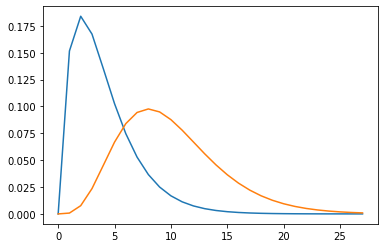

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import chi2
#1.
#get the range
x = np.arange(0, 28)
#plot the chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df = 4))
#plot the chi-square distribution with 10 degrees of freedom
plt.plot(x, chi2.pdf(x, df = 10))
#find the peak of the chi square distribution with 4 degrees of freedom
max_y = max(chi2.pdf(x, df = 4)) 
print("The peak value when v = 4 is, ",max_y)
#find the peak of the chi square distribution with 10 degrees of freedom
max_y = max(chi2.pdf(x, df = 10)) 
print("The peak value when v = 10 is, ",max_y)

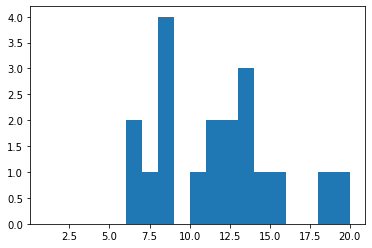

The mean is : 11
The standard deviation is:  3.7416573867739413
The sqrt of the mean is:  3.3166247903554


In [2]:
import math
#2.
#plot the array of cosmic rays collected and plotted a histogram 
numofcosmicrays = np.array([10, 12, 15, 8, 13, 14, 19, 18, 11, 13, 7, 8, 11, 8, 12, 6, 13, 8, 6])
plt.hist(numofcosmicrays, bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.show()
#find the mean of the cosmic rays array
cosmicraysmean = statistics.mean(numofcosmicrays)
print("The mean is :", cosmicraysmean)
#find the standard deviation of the cosmic rays array
cosmicraysstdev = statistics.stdev(numofcosmicrays)
print("The standard deviation is: ", cosmicraysstdev)
print("The sqrt of the mean is: ", math.sqrt(cosmicraysmean))

In [3]:
#3.
#find the linear regression for CSIRO
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("C:/Users/14694/Desktop/CSIRO_Recons_gmsl_mo_2011.txt", float, skiprows = 1)
x = np.array(data[:,0]) #independent variable
y = np.array(data[:,1]) #dependent variable
sig_y = np.array(data[:2]) #sigma or standard deviation
N = len(x) # # of data points
#define least squares fit as a function
def leastsqrs(x,y):
    #initialise our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
    #perform sums
    sum_x =np.sum(x)
    sum_y =np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
    #determine the coefficients A and B
    Delta = (N*sum_xx - sum_x*sum_x)
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (N*sum_xy - sum_x*sum_y)/Delta
    return[A,B]
#calculate chi sqr
def chi_calc(x,y,sig_y,A,B):
    chi_sqr = 0
    for i in range(1, len(sig_y)):
        chi_sqr += np.sum((y[i] - (A+B*x[i]))**2)/(2*sig_y[i]**2)
    return chi_sqr
coeffs = []
coeffs = leastsqrs(x, y)
A = coeffs[0]
B = coeffs[1]
chi_sqr = chi_calc(x,y,sig_y,A,B)
print ('The best straight line fit is y = {0:4.2f} + {1:4.2f}x'.format(A, B))

The best straight line fit is y = -3060.07 + 1.54x


C:\Users\Thinh\AppData\Local\Temp\ipykernel_7004\721777129.py:37: RuntimeWarning: divide by zero encountered in true_divide
  chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))


Number of data points =  219
A = -190.33 +/- -0.03, B =  1.13 +/- 0.00
chi-square =   inf
chi-square/dof =    inf
r = -0.84


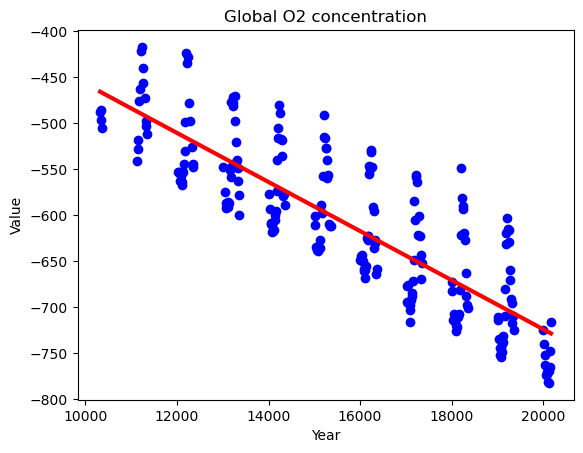

Text(0, 0.5, 'Value')

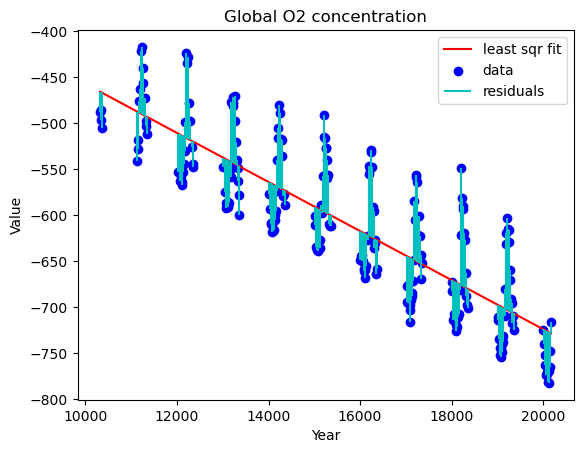

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('C:/Users/Thinh/Desktop/Global_O2_Concentration_2010_2020.txt',float, skiprows=1,usecols=[2,3,4])

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit 
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
    
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
    
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (N*sum_xy - sum_x*sum_y)/Delta
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = coeffs[0]
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {1:5.2f}, B = {2:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square)) 
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))

#plot data pts and fit
plt.plot(x,y,"bo")
xc = np.linspace(min(x), max(x), 50)
yc = A+B*xc
plt.plot(xc,yc,'r-', linewidth=3)
plt.title('Global O2 concentration')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots()
res = y - (A + B*x)
ax.plot(x,(A + B*x), 'r-')
ax.scatter(x,y,c='b')
ax.vlines(x,y,y-res, 'c')
plt.legend(('least sqr fit', 'data', 'residuals'), loc = 0)

plt.title('Global O2 concentration')
plt.xlabel('Year')
plt.ylabel('Value')    


Number of data points =  38
A = 193.58 +/-  0.00, B =  0.15 +/- 0.00
chi-square = 5826.35
chi-square/dof = 161.84
r =  1.00


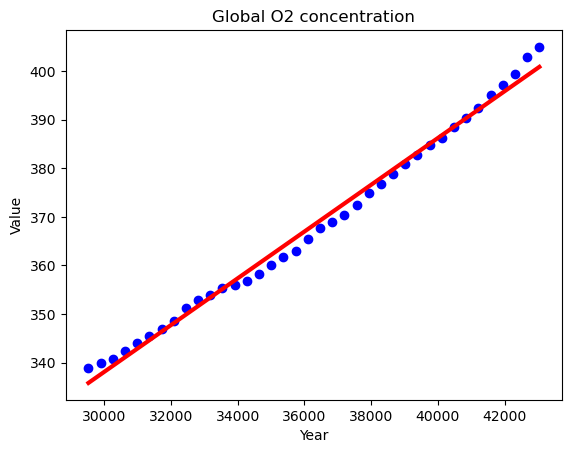

Text(0, 0.5, 'Value')

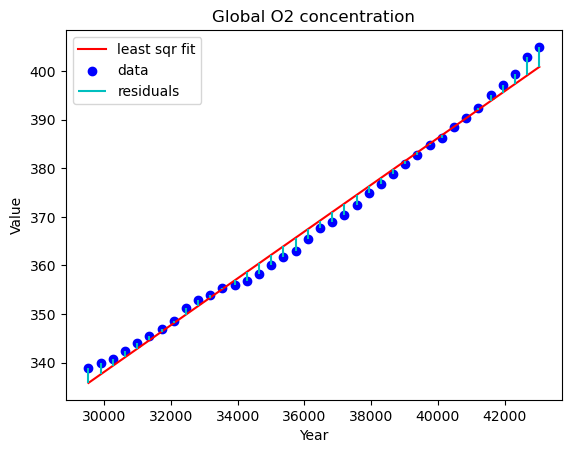

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('C:/Users/Thinh/Desktop/CO2-annmean.txt',float, skiprows=1)

x = np.array(data[:,0])  #independent variable
y = np.array(data[:,1])  #dependent variable
sig_y = np.array(data[:,2])
N = len(x)               #number of data points

#define least squares fit 
def leastsqrs(x,y):
    #initialize our variables
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_xx = 0
    A = 0
    B = 0
    
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.inner(x,y)
    
    #determine the coefficients A and B
    Delta = N*sum_xx - sum_x*sum_x
    A = (sum_xx*sum_y - sum_x*sum_xy)/Delta
    B = (N*sum_xy - sum_x*sum_y)/Delta
    sig_A = np.mean(sig_y)*np.sqrt(np.sum(x*x)/Delta)
    sig_B = np.mean(sig_y)*np.sqrt(N/Delta)    
    return [A,B,sig_A,sig_B]

#calculate chi square
def chi_calc(x,y,sig_y,A,B):
    chi_square = 0
    chi_square = np.sum((y - (A + B*x))**2/(2*sig_y**2))
    # for i in range(0,len(sig_y)):
    #     chi_square = chi_square + (y[i] - (A + B*x[i]))**2/(2*sig_y[i]**2)
    return chi_square

def r(x,y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_sqr = 0
    sum_ydiff_sqr = 0
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sum_xdiff_sqr = np.sum((x-x_bar)**2)
    sum_ydiff_sqr = np.sum((y-y_bar)**2)
    sum_diff_xy = np.sum((x-x_bar)*(y-y_bar))
    r = sum_diff_xy/np.sqrt(sum_xdiff_sqr*sum_ydiff_sqr)
    return r
coeffs = []
coeffs = leastsqrs(x,y)
A = coeffs[0]
B = coeffs[1]
sig_A = coeffs[2]
sig_B = coeffs[3]
chi_square = chi_calc(x, y, sig_y, A, B)

print('Number of data points = ', N)
print('A = {0:5.2f} +/- {1:5.2f}, B = {2:5.2f} +/-{3:5.2f}'.format(A,B,sig_A,sig_B))
print('chi-square = {0:5.2f}'.format(chi_square)) 
print('chi-square/dof = {0:6.2f}'.format(chi_square/(N-2)))
print("r = {0:5.2f}".format(r(x,y)))

#plot data pts and fit
plt.plot(x,y,"bo")
xc = np.linspace(min(x), max(x), 50)
yc = A+B*xc
plt.plot(xc,yc,'r-', linewidth=3)
plt.title('Global O2 concentration')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots()
res = y - (A + B*x)
ax.plot(x,(A + B*x), 'r-')
ax.scatter(x,y,c='b')
ax.vlines(x,y,y-res, 'c')
plt.legend(('least sqr fit', 'data', 'residuals'), loc = 0)

plt.title('Global O2 concentration')
plt.xlabel('Day')
plt.ylabel('Mean')   

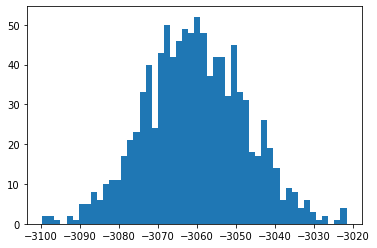

The best straight line fit is y = -3.06E+03 +/- 1.29E+01 + (1.54E+00 +/-6.62E-03)x
Mean A = -3060.4593, Std A = 12.8105
Mean B = 1.5380, Std B = 0.0066


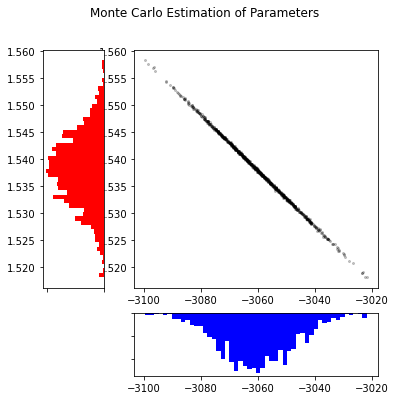

In [9]:
data = np.loadtxt("CSIRO_Recons_gmsl_mo_2011.txt", skiprows=1)
x = np.array(data[:,0])
y = np.array(data[:,1])
sig_y = np.array(data[:,2])
def leastsqr(x,y):
    sum_x = 0
    sum_y = 0
    sum_xx = 0
    sum_xy = 0
    A = 0
    B = 0
    N = len(x)
    #perform sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.inner(x,x) #dot product
    sum_xy = np.inner(x,y)
    #calculate the coefficients
    delta = N*(sum_xx) - sum_x**2
    A = (sum_xx*sum_y - sum_x*sum_xy)/delta
    B = (N*sum_xy - sum_x*sum_y)/delta
    sig_A = np.sqrt(sum((y - (A + B*x))**2/(N-2)))*np.sqrt(sum_xx/delta)
    sig_B = np.sqrt(sum((y - (A + B*x))**2/(N-2)))*np.sqrt( N/delta)
    return [A, sig_A, B, sig_B]
#calculate fit, print results, plot
coefficients = leastsqr(x,y)
A = coefficients[0]
unc_A = coefficients[1]
B = coefficients[2]
unc_B = coefficients[3]
N_trial = 1000 #number of trials
FitPars = np.array([])
#create arrays for values of A, B, and their uncertainties
A_values = np.zeros(N_trial)
B_values = np.zeros(N_trial)
unc_A_values = np.zeros(N_trial)
unc_B_values = np.zeros(N_trial)
N = len(x)
y_err = np.sqrt(sum((y-(A + B*x))**2)/(N-2))
xmin = x[0]
xmax = x[-1]
#create random data
for j in range(N_trial):
    xTrial = np.random.uniform(xmin, xmax, size=N)
    #create as many x values as original range
    yTrial = A + B*(xTrial) + np.random.normal(loc=0, scale = y_err, size = N)
    A_values[j], unc_A_values[j], B_values[j], unc_B_values[j] = leastsqr(xTrial, yTrial)
plt.hist(A_values, bins = 50)
plt.show()
A = np.mean(A_values)
B = np.mean(B_values)
unc_A = np.mean(unc_A_values)
unc_B = np.mean(unc_B_values)
print('The best straight line fit is y = {0:4.2E} +/- {1:4.2E} + ({2:4.2E} +/-{3:4.2E})x'.format(A,unc_A,B,unc_B))
print("Mean A = {0:6.4f}, Std A = {1:6.4f}".format(np.mean(A_values),
np.std(A_values)))
print("Mean B = {0:6.4f}, Std B = {1:6.4f}".format(np.mean(B_values),
np.std(B_values)))
#print("Mean B = ", np.mean(B_values), "Std B = ", np.std(B_values))
#multiaxis histogram
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Monte Carlo Estimation of Parameters')
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.5)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(A_values, B_values , 'ok', markersize=2, alpha=0.2)
# histogram on the attached axes
x_hist.hist(A_values, 50, histtype='stepfilled',
orientation='vertical', color='blue')
x_hist.invert_yaxis()
y_hist.hist(B_values, 50, histtype='stepfilled',
orientation='horizontal', color='red')
y_hist.invert_xaxis()
plt.show()